In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.7
learning_rate= 1e-4
wd=1e-1

num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])


In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


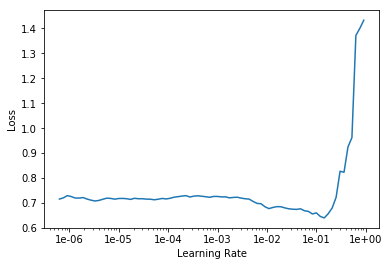

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.696173    0.651740    0.664093  (00:08)
2      0.677598    0.593516    0.776062  (00:08)
3      0.647078    0.585850    0.756757  (00:09)
4      0.630622    0.577023    0.768340  (00:09)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:09
epoch  train_loss  valid_loss  accuracy
1      0.636491    0.603900    0.698842  (00:22)
2      0.658743    0.596971    0.745174  (00:19)
3      0.604870    0.597292    0.714286  (00:23)
4      0.612588    0.578319    0.714286  (00:21)
5      0.572278    0.627119    0.648649  (00:22)
6      0.557884    0.514441    0.741313  (00:22)
7      0.537746    0.699413    0.664093  (00:24)
8      0.519168    0.473563    0.783784  (00:22)
9      0.542476    2.791652    0.389961  (00:22)
10     0.550791    0.496600    0.756757  (00:20)
11     0.517752    0.488583    0.779923  (00:19)
12     0.503706    0.438047    0.849421  (00:21)
13     0.449675    0.518248    0.718147  (00:23)
14     0.431813    0.564796    0.714286  (00:22)
15     0.438072    0.419080    0.822394  (00:22)
16     0.472208    0.583287    0.691120  (00:19)
17     0.470206    0.523009    0.714286  (00:19)
18     0.425764    0.460435    0.764479  (00:19)
19     0.427073    0.335045    0.872587  (00:19)
20     0.41

In [11]:
learn.validate()

[0.33343804, tensor(0.8649)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

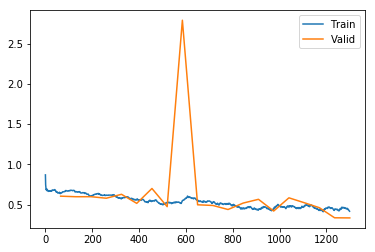

In [13]:
learn.recorder.plot_losses()

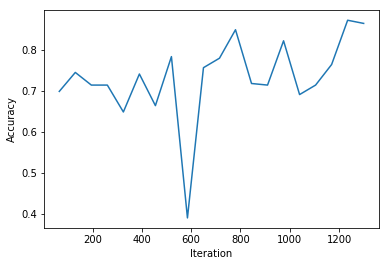

In [14]:
learn.recorder.plot_metrics()

In [112]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [113]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


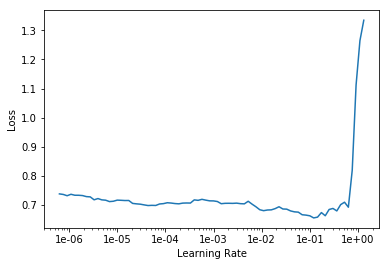

In [114]:
learn.recorder.plot()

In [115]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:57
epoch  train_loss  valid_loss  accuracy
1      0.680836    0.640960    0.664093  (00:14)
2      0.667034    0.706352    0.664093  (00:14)
3      0.641464    0.685866    0.664093  (00:15)
4      0.665663    0.727790    0.664093  (00:12)



In [116]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 12:59
epoch  train_loss  valid_loss  accuracy
1      0.685413    0.679809    0.664093  (00:33)
2      0.617194    0.722880    0.528958  (00:43)
3      0.628473    0.718729    0.664093  (00:41)
4      0.608381    0.646004    0.664093  (00:39)
5      0.589591    0.607904    0.706564  (00:37)
6      0.555282    0.640097    0.667954  (00:44)
7      0.578266    0.765814    0.664093  (00:35)
8      0.520662    0.510395    0.776062  (00:40)
9      0.497832    0.583966    0.729730  (00:39)
10     0.506719    0.454128    0.822394  (00:38)
11     0.506697    0.451071    0.779923  (00:36)
12     0.448109    0.371120    0.845560  (00:40)
13     0.437536    0.374210    0.861004  (00:43)
14     0.459965    0.362881    0.864865  (00:41)
15     0.457188    0.495234    0.722008  (00:37)
16     0.428601    0.481135    0.718147  (00:40)
17     0.471824    0.484705    0.749035  (00:35)
18     0.414789    0.316053    0.864865  (00:37)
19     0.441964    0.424830    0.783784  (00:39)
20     0.40

In [117]:
learn.validate()

[0.34749287, tensor(0.8456)]

In [118]:
accuracy_list.append(learn.validate()[1].item())

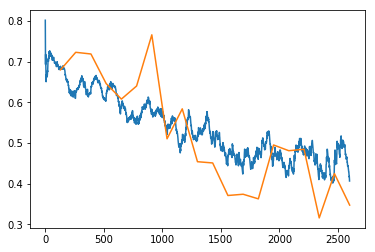

In [119]:
learn.recorder.plot_losses()

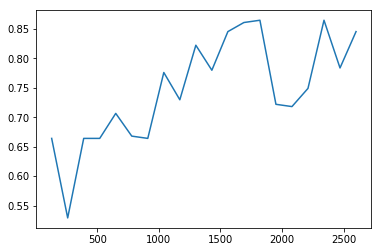

In [120]:
learn.recorder.plot_metrics()

In [121]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [122]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


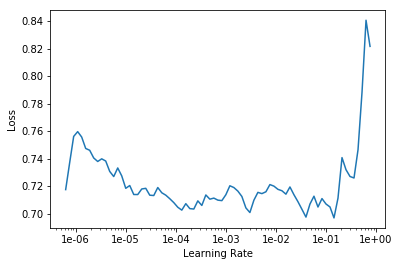

In [123]:
learn.recorder.plot()

In [124]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:53
epoch  train_loss  valid_loss  accuracy
1      0.713338    0.707697    0.335907  (00:12)
2      0.691328    0.644275    0.725869  (00:13)
3      0.649960    0.615427    0.725869  (00:14)
4      0.655354    0.607676    0.725869  (00:12)



In [125]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 13:02
epoch  train_loss  valid_loss  accuracy
1      0.624324    0.651884    0.648649  (00:37)
2      0.614509    0.637992    0.664093  (00:38)
3      0.626200    0.608525    0.664093  (00:38)
4      0.605139    0.603398    0.664093  (00:36)
5      0.595151    0.503870    0.725869  (00:38)
6      0.591346    0.499357    0.768340  (00:34)
7      0.559767    0.558295    0.664093  (00:38)
8      0.529235    0.400131    0.826255  (00:34)
9      0.494779    0.418259    0.768340  (00:40)
10     0.484749    0.440932    0.741313  (00:37)
11     0.449918    0.400418    0.853282  (00:44)
12     0.465948    0.410644    0.799228  (00:39)
13     0.470859    0.444628    0.722008  (00:40)
14     0.462919    0.621917    0.679537  (00:38)
15     0.432064    0.373969    0.799228  (00:44)
16     0.363218    0.546411    0.710425  (00:45)
17     0.398934    0.437879    0.737452  (00:38)
18     0.419055    0.467107    0.722008  (00:39)
19     0.444055    0.372090    0.814672  (00:33)
20     0.36

In [126]:
learn.validate()

[0.33319622, tensor(0.8842)]

In [127]:
accuracy_list.append(learn.validate()[1].item())

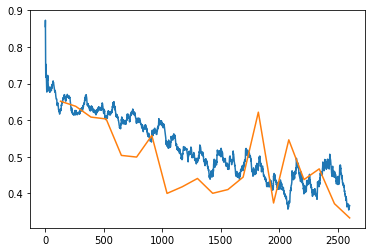

In [128]:
learn.recorder.plot_losses()

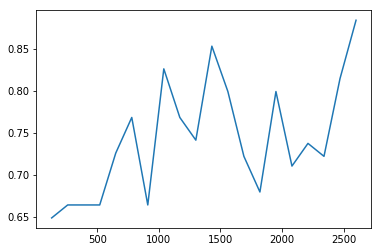

In [129]:
learn.recorder.plot_metrics()

In [130]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [131]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


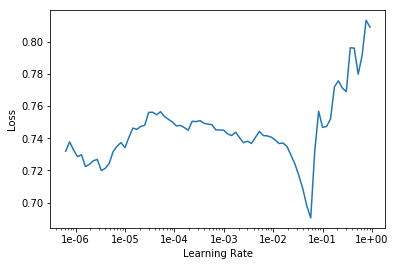

In [132]:
learn.recorder.plot()

In [133]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:55
epoch  train_loss  valid_loss  accuracy
1      0.675685    0.727163    0.664093  (00:15)
2      0.650222    0.730504    0.664093  (00:14)
3      0.677588    0.754145    0.664093  (00:12)
4      0.672495    0.681187    0.664093  (00:12)



In [134]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 12:57
epoch  train_loss  valid_loss  accuracy
1      0.626336    0.651910    0.664093  (00:38)
2      0.628184    0.727387    0.355212  (00:38)
3      0.638574    0.642590    0.664093  (00:35)
4      0.610618    0.652773    0.664093  (00:39)
5      0.599902    0.602187    0.722008  (00:37)
6      0.564027    0.755970    0.440154  (00:38)
7      0.603962    0.480335    0.822394  (00:33)
8      0.535530    0.579764    0.679537  (00:41)
9      0.522753    0.445002    0.787645  (00:37)
10     0.492546    0.403633    0.830116  (00:37)
11     0.525472    0.515356    0.779923  (00:36)
12     0.455138    0.418982    0.849421  (00:44)
13     0.407259    0.419001    0.791506  (00:45)
14     0.427256    0.374845    0.845560  (00:42)
15     0.446860    0.496283    0.718147  (00:35)
16     0.425402    0.365425    0.822394  (00:41)
17     0.447765    0.414021    0.799228  (00:35)
18     0.420888    0.778907    0.698842  (00:44)
19     0.424655    0.588561    0.733591  (00:35)
20     0.42

In [135]:
learn.validate()

[0.87164664, tensor(0.6641)]

In [136]:
accuracy_list.append(learn.validate()[1].item())

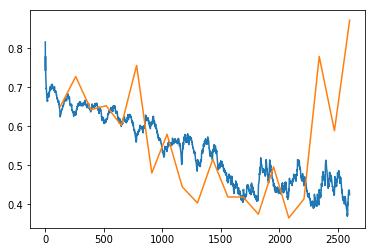

In [137]:
learn.recorder.plot_losses()

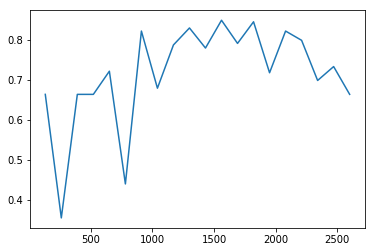

In [138]:
learn.recorder.plot_metrics()

In [139]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'],bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)

learn.freeze()

In [140]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


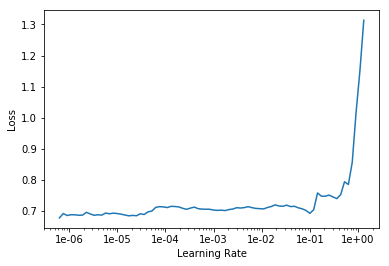

In [141]:
learn.recorder.plot()

In [142]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:54
epoch  train_loss  valid_loss  accuracy
1      0.700875    0.632215    0.725869  (00:14)
2      0.647003    0.610526    0.698842  (00:14)
3      0.666274    0.607814    0.698842  (00:12)
4      0.648119    0.604152    0.718147  (00:13)



In [143]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 13:08
epoch  train_loss  valid_loss  accuracy
1      0.580016    0.616052    0.706564  (00:45)
2      0.604459    0.608050    0.706564  (00:45)
3      0.659746    0.635266    0.664093  (00:34)
4      0.597932    0.606964    0.667954  (00:38)
5      0.567059    0.531656    0.667954  (00:42)
6      0.542297    0.465095    0.737452  (00:41)
7      0.528802    0.489158    0.698842  (00:37)
8      0.550839    0.430027    0.806950  (00:35)
9      0.522065    0.408612    0.772201  (00:41)
10     0.565198    0.691174    0.664093  (00:34)
11     0.499195    0.462836    0.841699  (00:38)
12     0.452768    0.429057    0.760618  (00:44)
13     0.483652    0.437977    0.818533  (00:35)
14     0.429910    0.542842    0.702703  (00:42)
15     0.487989    0.389210    0.818533  (00:38)
16     0.430023    0.389257    0.837838  (00:37)
17     0.420579    0.500750    0.725869  (00:39)
18     0.418966    0.444544    0.772201  (00:38)
19     0.449004    0.492848    0.806950  (00:35)
20     0.41

In [144]:
learn.validate()

[0.5830777, tensor(0.7259)]

In [145]:
accuracy_list.append(learn.validate()[1].item())

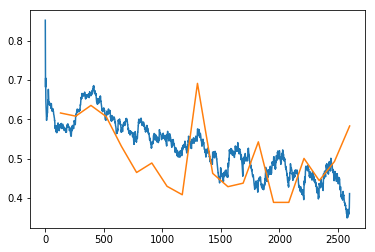

In [146]:
learn.recorder.plot_losses()

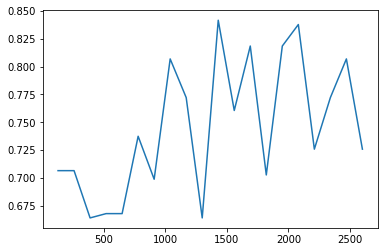

In [147]:
learn.recorder.plot_metrics()

In [148]:
print(accuracy_list)

[0.6640926599502563, 0.84555983543396, 0.88416987657547, 0.6640926599502563, 0.7258687019348145]


In [149]:
print(sum(accuracy_list)/len(accuracy_list))

0.7567567467689514


In [1]:
import numpy as np

log_preds,y = learn.preds()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

NameError: name 'learn' is not defined

In [150]:
import torch

torch.cuda.empty_cache()